In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data = data.rename(columns={'#Passengers':'Passengers'})

In [5]:
data['year'] = pd.DatetimeIndex(data['Month']).year
data['month'] = pd.DatetimeIndex(data['Month']).month


In [6]:
data.drop(['Month'],axis=1,inplace=True)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

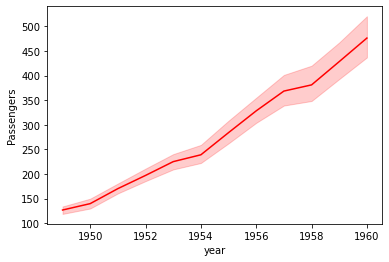

In [7]:
import seaborn as sns
sns.lineplot(x='year',y='Passengers',data=data,color='red')

<AxesSubplot:xlabel='month', ylabel='Passengers'>

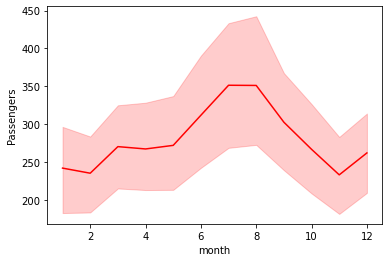

In [8]:
import seaborn as sns
sns.lineplot(x='month',y='Passengers',data=data,color='red')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

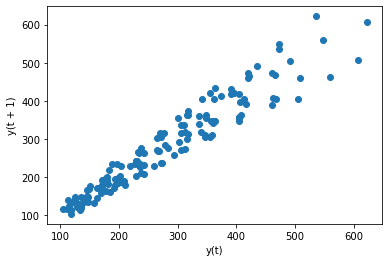

In [9]:
pd.plotting.lag_plot(data['Passengers'])

In [10]:
train_len = int(0.9*len(data))
test_len = len(data) - train_len


train,test = data.iloc[:train_len],data.iloc[train_len:len(data)]
print(data.shape,train.shape,test.shape)

(144, 3) (129, 3) (15, 3)


In [11]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs_pas = RobustScaler()

In [12]:
t_c = ['year','month']
train.loc[:,t_c] = rs.fit_transform(train[t_c].to_numpy())
test.loc[:,t_c] = rs.transform(test[t_c].to_numpy())

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [13]:
train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
test['Passengers'] = rs_pas.transform(test[['Passengers']])

<ipython-input-13-8d79c30db599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
<ipython-input-13-8d79c30db599>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Passengers'] = rs_pas.transform(test[['Passengers']])


In [14]:
train.to_numpy()
test.to_numpy()

array([[ 1.03030303,  0.83333333,  0.66666667],
       [ 0.75757576,  0.83333333,  0.83333333],
       [ 1.01818182,  0.83333333,  1.        ],
       [ 1.09090909,  1.        , -0.83333333],
       [ 0.93333333,  1.        , -0.66666667],
       [ 1.1030303 ,  1.        , -0.5       ],
       [ 1.35757576,  1.        , -0.33333333],
       [ 1.42424242,  1.        , -0.16666667],
       [ 1.80606061,  1.        ,  0.        ],
       [ 2.33333333,  1.        ,  0.16666667],
       [ 2.23636364,  1.        ,  0.33333333],
       [ 1.64242424,  1.        ,  0.5       ],
       [ 1.35757576,  1.        ,  0.66666667],
       [ 0.92727273,  1.        ,  0.83333333],
       [ 1.18181818,  1.        ,  1.        ]])

In [15]:
def create_dataset(x,y,time_steps=1):
    x_train,y_train = [],[]
    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values
        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])
    return np.array(x_train),np.array(y_train)

In [16]:
time_steps = 1

x_train,y_train = create_dataset(train,train.Passengers,time_steps)
x_test,y_test = create_dataset(test,test.Passengers,time_steps)

print(x_train.shape,y_train.shape)

(128, 1, 3) (128,)


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM ,Bidirectional,Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Bidirectional(LSTM(128,
                            input_shape=(1,3))))

In [20]:
model.add(Dropout(0.2))

In [21]:
model.add(Dense(units = 1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
history = model.fit(x_train,y_train,
                   epochs=30,
                   batch_size=16,
                   validation_split=0.2,
                   shuffle=False 
                   )

Epoch 1/30
7/7 [==============================] - 11s 941ms/step - loss: 0.2377 - val_loss: 1.0015
Epoch 2/30
7/7 [==============================] - 0s 23ms/step - loss: 0.1870 - val_loss: 0.8799
Epoch 3/30
7/7 [==============================] - 0s 24ms/step - loss: 0.1533 - val_loss: 0.7601
Epoch 4/30
7/7 [==============================] - 0s 24ms/step - loss: 0.1254 - val_loss: 0.6456
Epoch 5/30
7/7 [==============================] - 0s 16ms/step - loss: 0.1000 - val_loss: 0.5374
Epoch 6/30
7/7 [==============================] - 0s 13ms/step - loss: 0.0779 - val_loss: 0.4368
Epoch 7/30
7/7 [==============================] - 0s 22ms/step - loss: 0.0583 - val_loss: 0.3456
Epoch 8/30
7/7 [==============================] - 0s 19ms/step - loss: 0.0462 - val_loss: 0.2660
Epoch 9/30
7/7 [==============================] - 0s 12ms/step - loss: 0.0330 - val_loss: 0.2000
Epoch 10/30
7/7 [==============================] - 0s 12ms/step - loss: 0.0237 - val_loss: 0.1488
Epoch 11/30
7/7 [==========

In [24]:
model.save('airline4-copy1.h5')

In [25]:
import math
trainScore = model.evaluate(x_train,y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.03 MSE (0.17 RMSE)
Test Score: 0.09 MSE (0.30 RMSE)


In [26]:
x_test

array([[[ 1.03030303,  0.83333333,  0.66666667]],

       [[ 0.75757576,  0.83333333,  0.83333333]],

       [[ 1.01818182,  0.83333333,  1.        ]],

       [[ 1.09090909,  1.        , -0.83333333]],

       [[ 0.93333333,  1.        , -0.66666667]],

       [[ 1.1030303 ,  1.        , -0.5       ]],

       [[ 1.35757576,  1.        , -0.33333333]],

       [[ 1.42424242,  1.        , -0.16666667]],

       [[ 1.80606061,  1.        ,  0.        ]],

       [[ 2.33333333,  1.        ,  0.16666667]],

       [[ 2.23636364,  1.        ,  0.33333333]],

       [[ 1.64242424,  1.        ,  0.5       ]],

       [[ 1.35757576,  1.        ,  0.66666667]],

       [[ 0.92727273,  1.        ,  0.83333333]]])

In [27]:
y_pred = model.predict(x_test)
ot = rs_pas.inverse_transform(y_pred)
ot

array([[427.2096 ],
       [394.04285],
       [421.41928],
       [459.02405],
       [440.13037],
       [459.34534],
       [488.3977 ],
       [495.15747],
       [538.8522 ],
       [599.3462 ],
       [586.0842 ],
       [514.30896],
       [478.91486],
       [427.0127 ]], dtype=float32)

In [28]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)
y_pred_inv

array([[427.2096 ],
       [394.04285],
       [421.41928],
       [459.02405],
       [440.13037],
       [459.34534],
       [488.3977 ],
       [495.15747],
       [538.8522 ],
       [599.3462 ],
       [586.0842 ],
       [514.30896],
       [478.91486],
       [427.0127 ]], dtype=float32)

In [29]:
model.save('airline4-copy.h5')

In [30]:
trainScore = model.evaluate(x_train,y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.03 MSE (0.17 RMSE)
Test Score: 0.09 MSE (0.30 RMSE)


In [31]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)

arr_1 = np.array(y_test_inv)
arr_2 = np.array(y_pred_inv)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [32]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,362.0,427.209595
1,405.0,394.042847
2,417.0,421.419281
3,391.0,459.024048
4,419.0,440.130371
